# MSDS696 Practicum 2 
## Fall 8W2 2020

### Exploration of Colorado County-Level Voting Patterns 2010 - 2020

#### James D. Reed (jreed011@regis.edu)

<img src="../img/Mountains2.jpg" width="700" height="200" />

## Census Data Exploratory Data Analysis


In [ ]:
import requests
import pandas as pd
#import censusdata
from pathlib import Path
import censusFunctions as cf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from decouple import config
import os
%matplotlib inline

In [ ]:
global CENSUS_KEY
global GOOGLE_KEY

def get_census_keys():
    # Get CENSUS_KEY
    try:
        BASE_DIR = os.path.dirname(os.path.abspath(__file__))
    except NameError:  # We are the main py2exe script, not a module
        import sys
        BASE_DIR = os.path.dirname(os.path.abspath(sys.argv[0]))

    CENSUS = config('CENSUS_KEY')
    GOOGLE = config('GOOGLE_KEY')
    #print(f'CENSUS: {CENSUS}, GOOGLE: {GOOGLE}')
    return(CENSUS, GOOGLE)

In [ ]:
CENSUS_KEY, GOOGLE_KEY = get_census_keys()
#print(f'CENSUS: {CENSUS_KEY}, GOOGLE: {GOOGLE_KEY}')

---
## Decennial 2010 Census of Population

 - Demographics (age, sex, race, family structure))
 - Housing Occupancy and Ownership (vacant./occupied, rent/own)
 - Group Quarters Population (prisons, college dorms)

### Load Population DataFrame

In [ ]:
population_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/Census2010-population_df.p")

In [ ]:
population_df.head()

In [ ]:
population_df.describe()

In [ ]:
sns.set_context(context = 'notebook', font_scale = 1.1)
sns.set_style('dark')
plt.figure(figsize=(8,5))
population_sorted = population_df.sort_values('total_pop')
population_sorted = population_sorted[population_sorted['total_pop'] > 100000 ]
plt.title("Population of Colorado Counties > 100,000")
g = sns.barplot(y = 'total_pop', x = 'county', data = population_sorted)
g.set_xticklabels(labels = population_sorted['county'], rotation=30)

In [ ]:
plt.figure(figsize=(10,8))
pop_matrix = population_sorted.corr()
sns.heatmap(pop_matrix, cmap = 'Blues')

---
## Decennial Census - Gender

 - Housing Occupancy and Ownership (vacant./occupied, rent/own)
 - Group Quarters Population (prisons, college dorms)

### Load Gender DataFrame

In [ ]:
gender_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/Census2010-gender_df.p")

In [ ]:
gender_df.head()

In [ ]:
gender_df.describe()

## Gender Choropleth

In [ ]:
cf.gen_colo_choropleth(gender_df, 'decennial_2010_gender', 'male_21', 'Decennial 2010 Gender Population - 21yo Males', 'tab10')

In [ ]:
pals = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
        'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
        'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
        'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 
        'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 
        'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 
        'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
        'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 
        'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
        'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
        'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 
        'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 
        'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 
        'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 
        'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
        'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

pals = ['Accent',  'CMRmap', 'CMRmap_r', 'Dark2', 'Paired', 'PuRd', 'Spectral_r', 'terrain', 'tab10']

for p in pals:
    cf.gen_colo_choropleth(gender_df, 'decennial_2010_gender', 'female_21', 
                           'Decennial 2010 Gender Population - 21yo Female',p)


---
## Decennial Census 2010

Housing survey
 - Housing Occupancy and Ownership (vacant/occupied, rent/own)
 - Group Quarters Population (prisons, college dorms)

### Load Housing DataFrame

In [ ]:
 housing_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/Census2010-housing_df.p")

In [ ]:
housing_df.head()

In [ ]:
housing_df.describe()

## American Community Survey
 - Educational Attainment
 - Commuting (mode, time leaving, time travelled)
 - Disability Status
 
 #### Load ACS 2019 Population Data for Colorado Counties

In [36]:
acs19_pop_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/ACS19-acs19_pop_df.p")

In [37]:
acs19_pop_df.head()

,county,pop_by_sex,pbs_male,pbs_female,pop_und18,pop_und18_by_age,pop_lt3,pop_3_5,pop_6_8,pop_9_11,...,total_pop_by_age,pop_all_und18,pop_all_18_24,pop_all_25_34,pop_all_35_44,pop_all_45_54,pop_all_55_64,pop_all_65_over,state_id,county_id
0,Chaffee,20356,11304,9052,0,0,0,0,0,0,...,20356,2100,786,2262,1851,2915,3800,6642,8,15
1,Garfield,60061,30081,29980,14435,14435,2722,2408,2920,2700,...,60061,14435,4956,8498,9220,6820,7180,8952,8,45
2,Jefferson,582881,291077,291804,113197,112660,17193,17334,18244,20936,...,582881,113197,43778,88288,82233,73863,82433,99089,8,59
3,Adams,517421,263655,253766,135127,135092,21231,22013,23066,25057,...,517421,135127,45363,85655,76461,62854,56337,55624,8,1
4,Eagle,55127,30609,24518,11619,11619,1906,1223,1469,2653,...,55127,11619,4224,8061,9377,8234,6359,7253,8,37


In [38]:
acs19_pop_df.describe()

,pop_by_sex,pbs_male,pbs_female,pop_und18,pop_und18_by_age,pop_lt3,pop_3_5,pop_6_8,pop_9_11,pop_12_14,...,total_pop_by_age,pop_all_und18,pop_all_18_24,pop_all_25_34,pop_all_35_44,pop_all_45_54,pop_all_55_64,pop_all_65_over,state_id,county_id
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.0,27.000000
mean,202878.740741,102171.592593,100707.148148,44359.703704,44260.222222,6679.370370,7353.407407,7113.888889,7720.814815,7742.185185,...,202878.740741,44535.740741,18663.962963,32273.407407,28490.37037,24814.851852,24859.666667,29240.740741,8.0,59.481481
std,241418.908512,120939.763246,120503.425702,54348.648811,54213.912002,8381.356679,9458.239893,8736.908929,9484.759115,9311.446273,...,241418.908512,54202.999732,22887.865545,44459.745734,35012.99809,29394.073803,27874.520477,31819.590135,0.0,36.731217
min,20356.000000,10402.000000,9052.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20356.000000,2100.000000,786.000000,2135.000000,1851.00000,1993.000000,2805.000000,3807.000000,8.0,1.000000
25%,27898.500000,14273.500000,13285.500000,5876.500000,5871.500000,738.500000,940.500000,1071.500000,762.500000,1204.000000,...,27898.500000,5876.500000,2137.000000,3259.500000,3517.50000,3382.000000,4621.000000,6002.000000,8.0,33.000000
50%,56221.000000,30081.000000,28419.000000,11619.000000,11619.000000,1906.000000,1725.000000,1841.000000,2653.000000,1915.000000,...,56221.000000,11619.000000,4956.000000,8061.000000,9220.00000,6838.000000,7609.000000,10232.000000,8.0,59.000000
75%,338675.000000,169891.000000,169049.000000,76664.500000,76550.000000,10515.500000,11958.500000,11596.000000,13662.500000,13388.000000,...,338675.000000,76664.500000,36679.000000,47931.500000,44582.00000,40192.000000,42860.500000,45868.500000,8.0,86.000000
max,727211.000000,364631.000000,362580.000000,171269.000000,171073.000000,25248.000000,31947.000000,28463.000000,29190.000000,27868.000000,...,727211.000000,171269.000000,77821.000000,172142.000000,117716.00000,83980.000000,84558.000000,99089.000000,8.0,123.000000


## American Community Survey
 - Marital Status: 
     + Never married
     + Now married
     + Separated
     + Widowed
     + Divorced
     
#### Load Marital Status Data Frame

In [39]:
acs19_mar_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/ACS19-acs19_mar_df.p")

In [40]:
acs19_mar_df.head()

,county,total_marital,never_married,now_married,separated,widowed,divorced,state_id,county_id
0,Chaffee,18661,3303,11236,47,1513,2562,8,15
1,Garfield,47774,13264,27474,500,1713,4823,8,45
2,Jefferson,490331,147548,256343,5533,21255,59652,8,59
3,Adams,405343,132990,201572,8200,14712,47869,8,1
4,Eagle,45961,17827,22549,202,484,4899,8,37


In [41]:
acs19_mar_df.describe()

,total_marital,never_married,now_married,separated,widowed,divorced,state_id,county_id
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.000000
mean,166093.888889,53645.037037,84189.444444,2032.888889,6808.740741,19417.777778,8.0,59.481481
std,196969.366416,70056.734988,95888.613426,2723.136460,8014.699647,23145.732405,0.0,36.731217
min,17252.000000,3303.000000,9836.000000,43.000000,220.000000,1931.000000,8.0,1.000000
25%,23051.000000,5549.000000,14000.000000,197.500000,1201.500000,3009.000000,8.0,33.000000
50%,47675.000000,13830.000000,24411.000000,565.000000,1934.000000,6445.000000,8.0,59.000000
75%,278456.500000,89012.000000,145282.500000,2489.000000,10920.000000,28249.500000,8.0,86.000000
max,608905.000000,260501.000000,305249.000000,8200.000000,25003.000000,75522.000000,8.0,123.000000


vmin: 9836 vmax: 305249


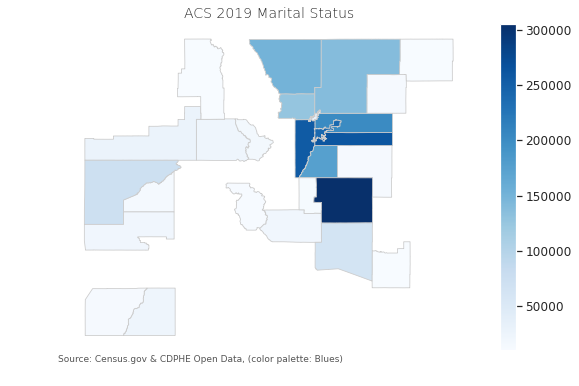

In [44]:
cf.gen_colo_choropleth(acs19_mar_df, 'ACS 2019 Marital Status', 'now_married', 'ACS 2019 Marital Status', 'Blues')

## 2019 1-Year Supplemental Estimates

### Poverty and Disability Estimates

#### Load Poverty and Disability Estimates Data FRame

In [45]:
acs19_pov_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/ACS19-acs19_pov_df.p")

In [46]:
acs19_pov_df.head()

,county,total_pov_hsh_type,total_below_pov,pov_below_married_cpl,pov_below_other,pov_below_other_male,pov_below_other_female,total_above_pov_hsh_type,above_pov_married_cpl,above_pov_other,...,total_types_w_dis,types_hearing,types_vision,types_cognitive,types_ambulatory,types_self_care,types_ind_living,types_no_dis,state_id,county_id
0,Chaffee,0,0,0,0,0,0,0,0,0,...,2717,1147,453,494,1289,286,934,16190,8,15
1,Garfield,16586,1226,659,567,0,567,15360,12110,3250,...,5265,1354,1443,1696,2755,834,1940,54104,8,45
2,Jefferson,154711,7147,3013,4134,926,3208,147564,117686,29878,...,60945,20145,10751,21004,26206,9339,21418,514740,8,59
3,Adams,119506,8997,3703,5294,426,4868,110509,85305,25204,...,52962,14796,8910,18513,24133,7254,16573,460750,8,1
4,Eagle,0,0,0,0,0,0,0,0,0,...,3319,1132,316,1205,1475,366,687,51466,8,37


vmin: 0 vmax: 11528


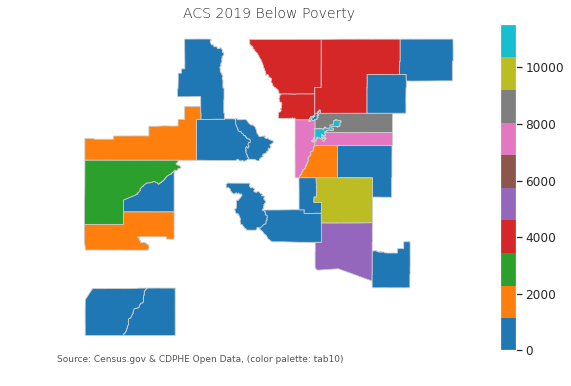

In [47]:
cf.gen_colo_choropleth(acs19_pov_df, 'ACS_2019_Poverty', 'total_below_pov', 'ACS 2019 Below Poverty', 'tab10')

vmin: 1106 vmax: 81478


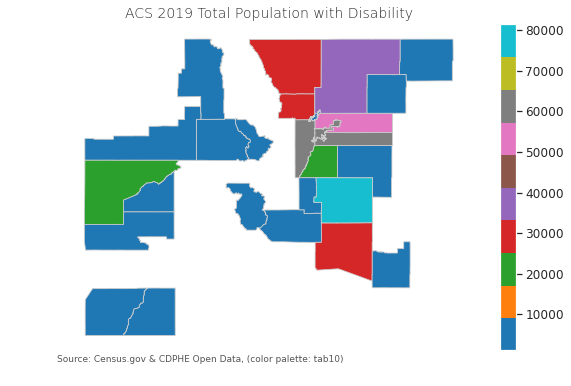

In [48]:
cf.gen_colo_choropleth(acs19_pov_df, 'ACS_2019_Poverty', 'total_types_w_dis', 'ACS 2019 Total Population with Disability',  'tab10')

In [ ]:
acs19_pov_df.describe()

In [ ]:
cf.gen_colo_choropleth(acs19_pov_df, 'ACS_2019_Poverty', 'total_below_pov', 'ACS 2019 1-Year Supplemental Estimates, Total Below Poverty', 'tab10')

## 2019 1-Year Supplemental Estimates

### Household Income Estimates
 

#### Restore Data Frame from Disk

In [ ]:
acs19_inc_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/ACS19-acs19_inc_df.p")

In [ ]:
acs19_inc_df.head()

In [35]:
acs19_inc_df.med_household_inc.astype(int)
tabulate(acs19_inc_df)

NameError: name 'tabulate' is not defined

In [ ]:
cf.gen_colo_choropleth(acs19_inc_df, 'ACS_2019_Poverty', 'med_household_inc', 
                       'ACS 2019 2019 1-Year Supplemental Estimates, Median Household Income', 'tab10')

In [ ]:
from datetime import date
print(f'Complete: {date.today()}')